In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

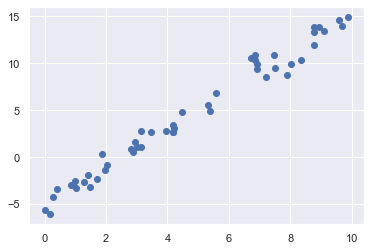

In [3]:
#生成数据
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

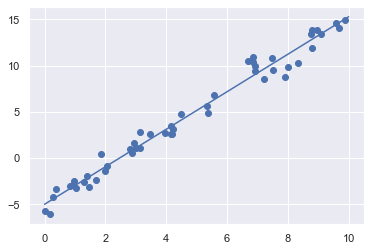

In [4]:
#训练模型
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
#斜率
print("Model slope:    ", model.coef_[0])
#截距
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


In [6]:
#Basis Function Regression（基函数回归，增加变换的回归）
#多项式
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
import sklearn.preprocessing
x = np.array([2, 3, 4])
poly = sklearn.preprocessing.PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

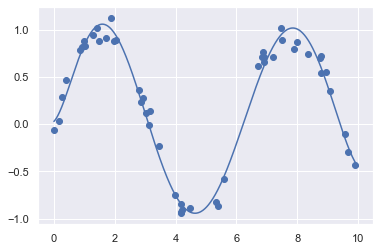

In [7]:
#利用7次多项式拟合sin数据
import sklearn.pipeline 
poly_model = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(7),sklearn.linear_model.LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [8]:
#斜率
print("poly_model slope:    ", poly_model.named_steps["linearregression"].coef_)
#截距,此时无意义
print("poly_model intercept:", poly_model.named_steps["linearregression"].intercept_)

poly_model slope:     [ 0.00000000e+00  3.31250195e-01  1.28845777e+00 -1.06474496e+00
  2.90659230e-01 -3.57011703e-02  2.01614684e-03 -4.20513336e-05]
poly_model intercept: 0.028472625948991692


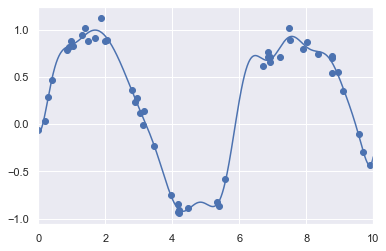

In [9]:
#高斯基函数
import sklearn.base

class GaussianFeatures(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = sklearn.pipeline.make_pipeline(GaussianFeatures(20),sklearn.linear_model.LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [10]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

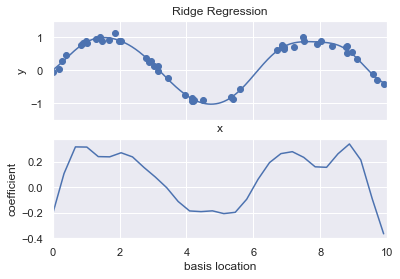

In [11]:
#岭回归
import sklearn.linear_model
model = sklearn.pipeline.make_pipeline(GaussianFeatures(30), sklearn.linear_model.Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

C:\Users\hnjyz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870490665, tolerance: 0.002065280097246271
  positive)


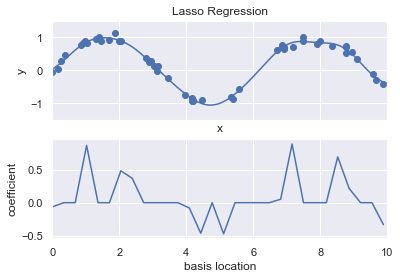

In [12]:
#lasso回归
import sklearn.linear_model
model = sklearn.pipeline.make_pipeline(GaussianFeatures(30), sklearn.linear_model.Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')